# 🐊 Analyse des espèces mondiales de crocodiles

## Aperçu du projet

Ce projet utilise un ensemble de données sur les crocodiles du monde entier afin d'analyser leurs caractéristiques biologiques et géographiques.  
L'objectif est de comprendre la distribution des espèces, de prédire certaines caractéristiques comme la taille adulte ou le poids, et d'identifier les facteurs les plus importants pour la conservation et la gestion des populations.  

Le dataset contient des informations sur :  
- Le type et la classification de l'espèce  
- Les caractéristiques biologiques (taille, poids, âge à maturité)  
- La répartition géographique  
- Les observations enregistrées dans le monde entier

Ce projet permettra de construire des modèles de régression et de classification, d'évaluer leur performance et de fournir des recommandations pratiques pour la conservation des crocodiles.


###  Compréhension du métier (Business Understanding)

**Problématique principale :**  
Comment prédire certaines caractéristiques des crocodiles (taille, poids, classification, etc.) et identifier les facteurs influençant leur distribution dans le monde, afin de soutenir la recherche et la conservation des espèces ?

**Parties prenantes :**  
- Chercheurs et biologistes spécialisés en crocodiles  
- Organisations de protection de la faune  
- Data scientists et analystes de données  

**Objectifs du projet :**  
- Construire des modèles supervisés pour prédire la classification ou des caractéristiques biologiques des crocodiles (régression ou classification).  
- Identifier les facteurs influençant la taille, le poids et la répartition des espèces.  
- Fournir des recommandations exploitables pour la recherche et la conservation.


### Data Understanding

L'objectif de cette étape est de comprendre la structure et le contenu du dataset avant de commencer la préparation et la modélisation.

L'ensemble de données `crocodile_dataset.csv` contient des informations sur plusieurs espèces de crocodiles dans le monde. Chaque enregistrement inclut :  
- Le type et la classification de l'espèce (genre, espèce, famille)  
- Les caractéristiques biologiques (taille adulte, poids, âge à maturité, etc.)  
- La répartition géographique et habitats naturels  
- Les observations et mesures enregistrées par les chercheurs  
- Les comportements et interactions avec l’environnement  
- Les éventuelles notes ou commentaires des chercheurs  

**Objectifs de l'exploration des données :**  
- Identifier les colonnes **numériques** et **catégorielles**  
- Détecter les **valeurs manquantes ou aberrantes**  
- Comprendre la **distribution des espèces, tailles et poids**  
- Fournir un **premier aperçu des relations entre les variables**, qui guidera la préparation des données et le choix des modèles  

Cette étape permettra de préparer un **jeu de données propre et exploitable** pour la modélisation supervisée (régression ou classification) et pour des analyses exploratoires comme le clustering ou la visualisation géographique.


###  Data Preparation

Cette étape vise à préparer le dataset pour la modélisation supervisée et non supervisée.  

**Étapes réalisées :**  
1. **Nettoyage des données**  
   - Suppression des doublons pour éviter les biais dans les modèles.  

2. **Gestion des valeurs manquantes**  
   - Colonnes numériques : remplissage avec la médiane.  
   - Colonnes catégorielles : remplissage avec la valeur la plus fréquente.  

3. **Transformation des variables**  
   - Conversion des colonnes de type texte ou date en formats exploitables (ex. année de naissance, âge, etc.)  
   - Création de nouvelles features si nécessaire (ex. ratio poids/taille, âge relatif).  

4. **Encodage des variables catégorielles**  
   - Transformation des colonnes telles que `Genre`, `Famille`, `Habitat` en valeurs numériques à l’aide de `LabelEncoder` ou `OneHotEncoder`.  

5. **Mise à l’échelle des features numériques**  
   - Standardisation des colonnes comme `Taille adulte`, `Poids`, `Âge à maturité` pour les modèles sensibles à l’échelle (KNN, réseaux neuronaux).  

6. **Séparation des données**  
   - Création des jeux `X_train`, `X_test`, `y_train`, `y_test` selon la variable cible choisie (ex. classification de l’espèce ou prédiction du poids).  

Cette préparation garantit que les modèles de classification, régression, clustering et analyses avancées puissent être appliqués efficacement et produire des résultats fiables et interprétables.


In [2]:
# =========================
# Import des librairies
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score


### Lecture du dataset

In [3]:
# =========================
#  Lecture du dataset
# =========================
data = pd.read_csv("crocodile_dataset.csv")

# Affichage des premières lignes
data.head(10)


,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...
5,6,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,2.64,137.4,Adult,Male,08-06-2023,India,Reservoirs,Vulnerable,Randy Brown,Source husband at tree note responsibility def...
6,7,Siamese Crocodile,Crocodylus siamensis,Crocodylidae,Crocodylus,2.85,157.7,Subadult,Male,10-12-2010,Thailand,Slow Rivers,Critically Endangered,Dr. Marvin Thomas Jr.,Much section investment on gun young catch man...
7,8,Congo Dwarf Crocodile,Osteolaemus osborni,Crocodylidae,Osteolaemus,0.35,4.7,Juvenile,Unknown,03-08-2008,Central African Republic,Forest Swamps,Data Deficient,Terri Frazier,Race Mr environment political born itself law ...
8,9,West African Crocodile,Crocodylus suchus,Crocodylidae,Crocodylus,3.05,201.2,Adult,Male,16-04-2020,Sudan,Lakes,Least Concern,Deborah Mason,Medical blood personal success medical current...
9,10,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,3.39,197.2,Adult,Male,21-05-2016,Mexico,Lagoons,Least Concern,Tamara George,Affect upon these story film around there wate...


In [4]:
# =========================
# Nettoyage des doublons
# =========================
print("Nombre de doublons :", data.duplicated().sum())

# Suppression des doublons
data = data.drop_duplicates()

# Vérification
print("Nouvelle dimension du dataset :", data.shape)


Nombre de doublons : 0
Nouvelle dimension du dataset : (1000, 15)


In [5]:
# =========================
#Gestion des valeurs manquantes
# =========================

# Colonnes numériques
numeric_cols = data.select_dtypes(include=['float64','int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Colonnes catégorielles
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Vérification
print("Valeurs manquantes par colonne après traitement :")
print(data.isnull().sum())


Valeurs manquantes par colonne après traitement :
Observation ID          0
Common Name             0
Scientific Name         0
Family                  0
Genus                   0
Observed Length (m)     0
Observed Weight (kg)    0
Age Class               0
Sex                     0
Date of Observation     0
Country/Region          0
Habitat Type            0
Conservation Status     0
Observer Name           0
Notes                   0
dtype: int64


In [6]:
# =========================
#  Encodage des variables catégorielles
# =========================

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Vérification
data[categorical_cols].head()


,Common Name,Scientific Name,Family,Genus,Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,7,5,0,0,0,1,917,1,27,3,19,141
1,0,0,0,0,0,1,813,45,16,4,109,28
2,11,2,0,0,2,2,212,45,6,0,656,219
3,7,5,0,0,0,1,22,29,22,3,287,568
4,8,8,0,0,0,2,435,17,22,4,269,161


In [11]:
print(data.columns)


Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')


In [13]:
#  Normalisation des colonnes numériques
# ===============================
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
print(data[numeric_cols].head())

   Observed Length (m)  Observed Weight (kg)
0            -0.469565             -0.535536
1             1.526801              1.020725
2            -1.217063             -0.214575
3             0.004458             -0.373342
4             1.216862              0.648936


### Préparation des données (features et target)

In [14]:
# Exemple : classification pour prédire le statut de conservation
target_col = 'Conservation Status'
X = data.drop(target_col, axis=1)
y = data[target_col]

# Vérification des dimensions
print("X shape :", X.shape)
print("y shape :", y.shape)


X shape : (1000, 14)
y shape : (1000,)


### Séparation Train/Test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train :", X_train.shape, "X_test :", X_test.shape)
print("y_train :", y_train.shape, "y_test :", y_test.shape)


X_train : (800, 14) X_test : (200, 14)
y_train : (800,) y_test : (200,)


### Modélisation – Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)


### Évaluation de la classification

Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        34

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



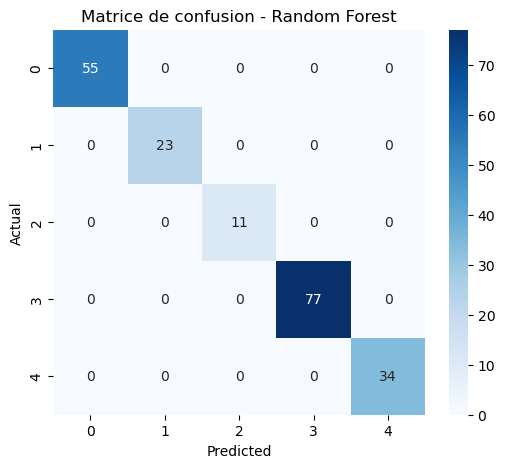

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))

# Rapport complet
print("Classification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice de confusion - Random Forest")
plt.show()


### Importance des variables

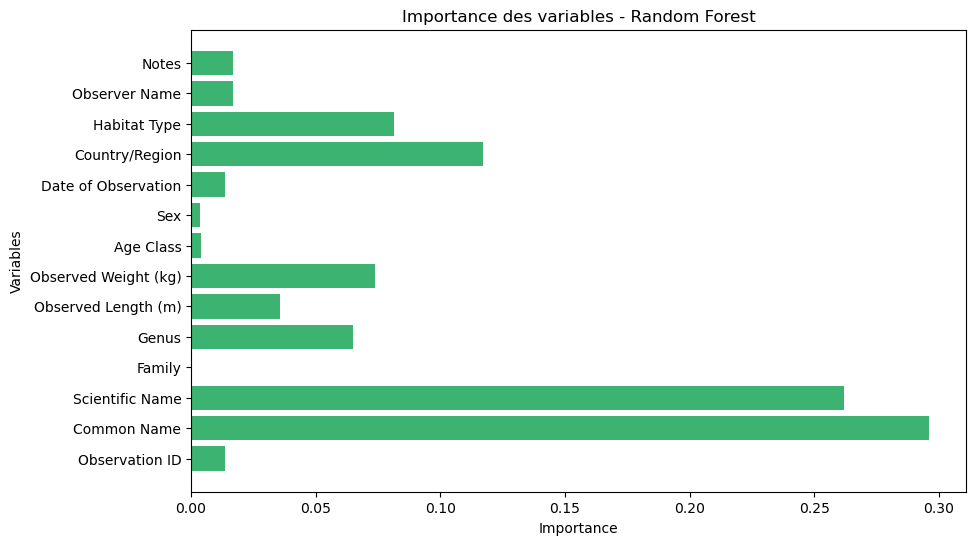

In [29]:
importances = rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances, color='mediumseagreen')
plt.title("Importance des variables - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()


### Optimisation hyperparamètres (optionnelle)

In [27]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # <-- retirer 'auto'
}
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Meilleurs paramètres :", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Meilleurs paramètres : {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}


### Visualisations supplémentaires

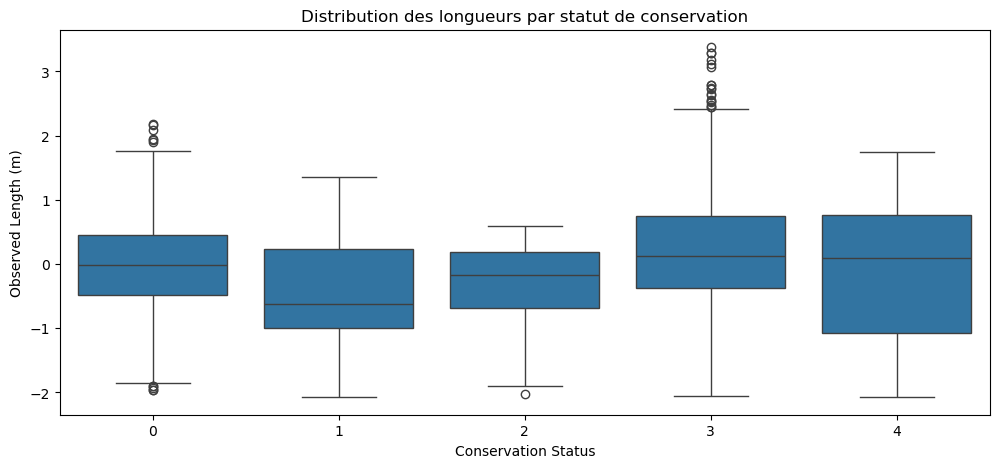

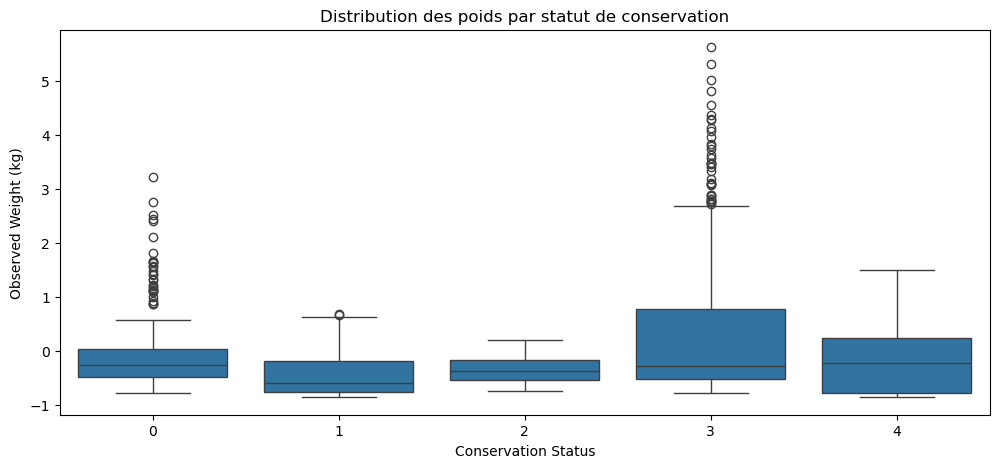

In [20]:
# Distribution des longueurs et poids par statut de conservation
plt.figure(figsize=(12,5))
sns.boxplot(x=data['Conservation Status'], y=data['Observed Length (m)'])
plt.title("Distribution des longueurs par statut de conservation")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=data['Conservation Status'], y=data['Observed Weight (kg)'])
plt.title("Distribution des poids par statut de conservation")
plt.show()


### Préparation des données pour régression

In [21]:
# Target pour régression
target_col_reg = 'Observed Weight (kg)'
X_reg = data.drop(target_col_reg, axis=1)
y_reg = data[target_col_reg]

# Encodage des colonnes catégorielles
categorical_cols = X_reg.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X_reg[col] = le.fit_transform(X_reg[col].astype(str))

# Standardisation des colonnes numériques
numeric_cols = X_reg.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_reg[numeric_cols] = scaler.fit_transform(X_reg[numeric_cols])

# Séparation Train/Test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("X_train_reg :", X_train_reg.shape, "X_test_reg :", X_test_reg.shape)


X_train_reg : (800, 14) X_test_reg : (200, 14)


### Modélisation régression – Random Forest Regressor

In [22]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Prédictions
y_pred_reg = rf_reg.predict(X_test_reg)


### Évaluation régression

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Utilisation de la nouvelle fonction
rmse = root_mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("RMSE :", rmse)
print("R² :", r2)


RMSE : 0.1370205094635932
R² : 0.9774522712737252


### Importance des variables (régression)

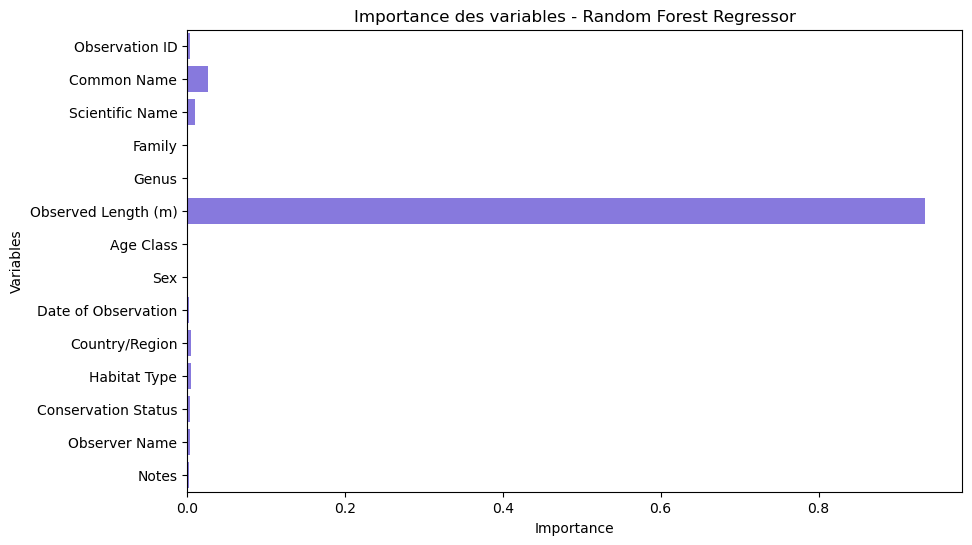

In [35]:
importances_reg = rf_reg.feature_importances_
features_reg = X_train_reg.columns

plt.figure(figsize=(10,6))
sns.barplot(
    x=importances_reg,
    y=features_reg,
    orient='h',
    color="mediumslateblue"  # couleur unique au lieu de palette
)
plt.title("Importance des variables - Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()


### Explicabilité SHAP

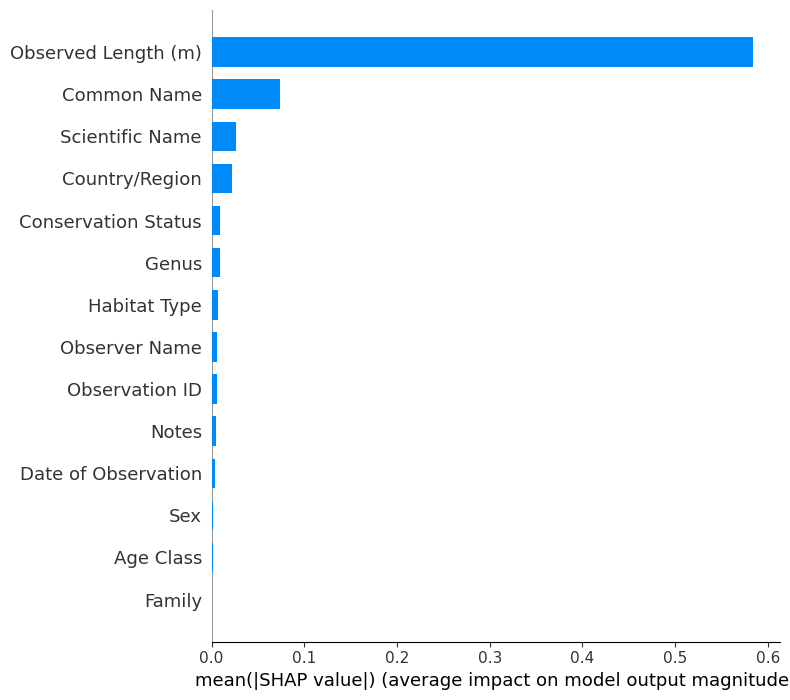

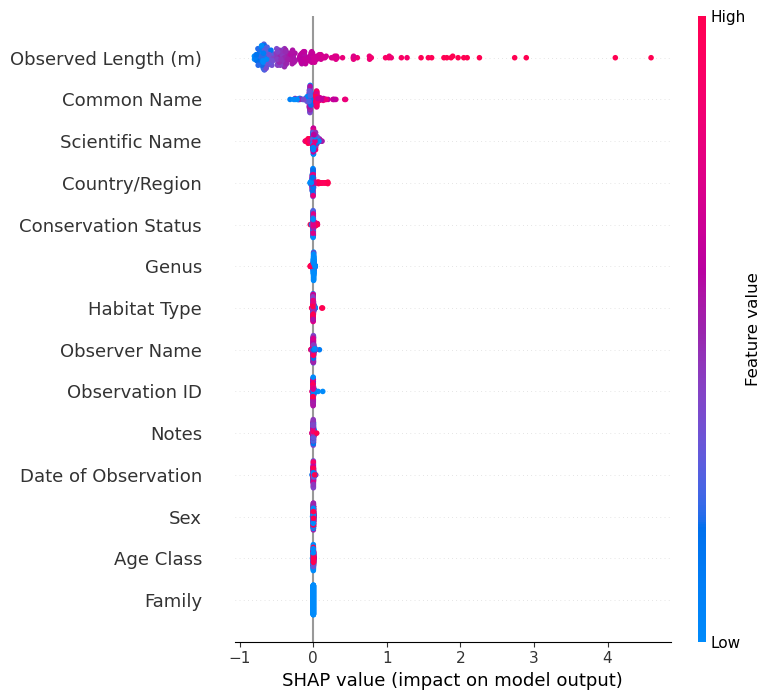

In [25]:
import shap

# Explainer
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test_reg)

# Summary plot
shap.summary_plot(shap_values, X_test_reg, plot_type="bar")
shap.summary_plot(shap_values, X_test_reg)


### Visualisations supplémentaires

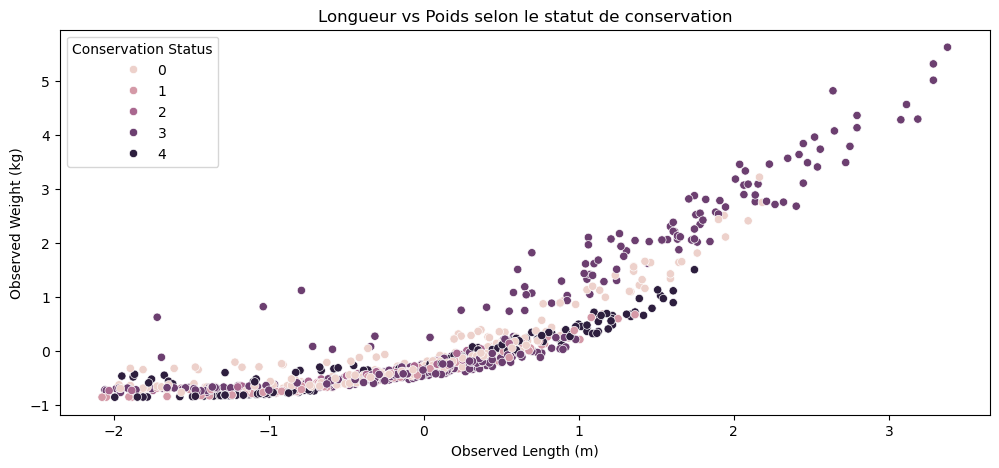

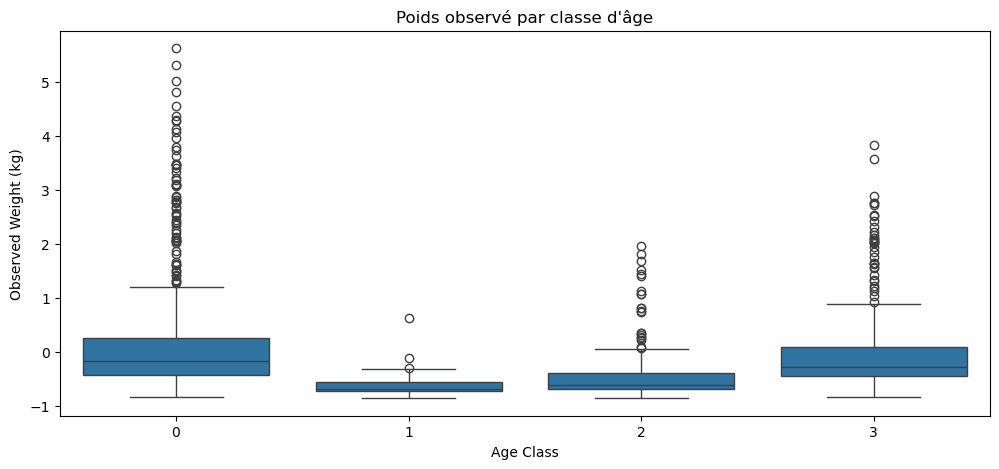

In [26]:
# Longueur vs poids par statut de conservation
plt.figure(figsize=(12,5))
sns.scatterplot(x=data['Observed Length (m)'], y=data['Observed Weight (kg)'], hue=data['Conservation Status'])
plt.title("Longueur vs Poids selon le statut de conservation")
plt.show()

# Boxplot par Age Class
plt.figure(figsize=(12,5))
sns.boxplot(x=data['Age Class'], y=data['Observed Weight (kg)'])
plt.title("Poids observé par classe d'âge")
plt.show()
